# Data Parsing
This notebook is intended for parsing csv data to json data. This will increase to loading speed for initializing the frontend web.

In [1]:
import pandas as pd
import json
import missingno as msno

In [2]:
# manually specify the data type of specific columns cid_cases
dtype_for_health_quality = {
    'Year': "Int64",
    'Data_Value_Footnote_Symbol': str,
    'Data_Value_Footnote': str,
    'Data_Value_Std_Err': str,
    'Data_Value_Unit': str,
    'Sample_Size': "Int64"
}

df_health_quality = pd.read_csv(
    '../health-related-quality-of-life/rows.csv', 
    dtype=dtype_for_health_quality
)

df_cid_cases = pd.read_csv(
    '../infectious-disease-2001-2014/rows.csv'
)

## Simple EDA

In [3]:
df_cid_cases.head()

,Disease,County,Year,Sex,Count,Population,Rate,CI.lower,CI.upper,Unstable
0,Amebiasis,California,2001,Total,571,34514777,1.654,1.521,1.796,
1,Amebiasis,California,2001,Female,176,17340743,1.015,0.871,1.176,
2,Amebiasis,California,2001,Male,365,17174034,2.125,1.913,2.355,
3,Amebiasis,California,2002,Total,442,34940334,1.265,1.150,1.389,
4,Amebiasis,California,2002,Female,145,17555714,0.826,0.697,0.972,


In [4]:
df_cid_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141777 entries, 0 to 141776
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Disease     141777 non-null  object 
 1   County      141777 non-null  object 
 2   Year        141777 non-null  int64  
 3   Sex         141777 non-null  object 
 4   Count       141777 non-null  int64  
 5   Population  141777 non-null  int64  
 6   Rate        141777 non-null  float64
 7   CI.lower    141777 non-null  float64
 8   CI.upper    141777 non-null  float64
 9   Unstable    141777 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 10.8+ MB


In [5]:
df_health_quality.head()

,Year,LocationAbbr,LocationDesc,Category,Topic,Question,DataSource,Data_Value_Unit,Data_Value_Type,Data_Value,...,Sample_Size,Break_Out,Break_Out_Category,GeoLocation,CategoryId,TopicId,QuestionId,LocationId,BreakOutId,BreakOutCategoryid
0,2010,AL,Alabama,Health Status/Healthy Days,Activity Limitation,Mean days of activity limitation,HRQOL,NaN,Average number of days,0.9,...,202,18-24 years old,Age Group,"(32.84057112200048, -86.63186076199969)",HLT001,POORHLTH,AL002,1,Age1,GPAGE
1,2010,AL,Alabama,Health Status/Healthy Days,Activity Limitation,Mean days of activity limitation,HRQOL,NaN,Average number of days,2.0,...,597,25-34 years old,Age Group,"(32.84057112200048, -86.63186076199969)",HLT001,POORHLTH,AL002,1,Age2,GPAGE
2,2010,AL,Alabama,Health Status/Healthy Days,Activity Limitation,Mean days of activity limitation,HRQOL,NaN,Average number of days,2.3,...,892,35-44 years old,Age Group,"(32.84057112200048, -86.63186076199969)",HLT001,POORHLTH,AL002,1,Age3,GPAGE
3,2010,AL,Alabama,Health Status/Healthy Days,Activity Limitation,Mean days of activity limitation,HRQOL,NaN,Average number of days,4.2,...,1352,45-54 years old,Age Group,"(32.84057112200048, -86.63186076199969)",HLT001,POORHLTH,AL002,1,Age4,GPAGE
4,2010,AL,Alabama,Health Status/Healthy Days,Activity Limitation,Mean days of activity limitation,HRQOL,NaN,Average number of days,4.0,...,1621,55-64 years old,Age Group,"(32.84057112200048, -86.63186076199969)",HLT001,POORHLTH,AL002,1,Age5,GPAGE


In [6]:
df_health_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126464 entries, 0 to 126463
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Year                        119808 non-null  Int64  
 1   LocationAbbr                126464 non-null  object 
 2   LocationDesc                126464 non-null  object 
 3   Category                    126464 non-null  object 
 4   Topic                       126464 non-null  object 
 5   Question                    126464 non-null  object 
 6   DataSource                  126464 non-null  object 
 7   Data_Value_Unit             63232 non-null   object 
 8   Data_Value_Type             126464 non-null  object 
 9   Data_Value                  110389 non-null  float64
 10  Data_Value_Footnote_Symbol  3936 non-null    object 
 11  Data_Value_Footnote         16075 non-null   object 
 12  Data_Value_Std_Err          0 non-null       object 
 13  Low_Confidence

## Missing value

<AxesSubplot:>

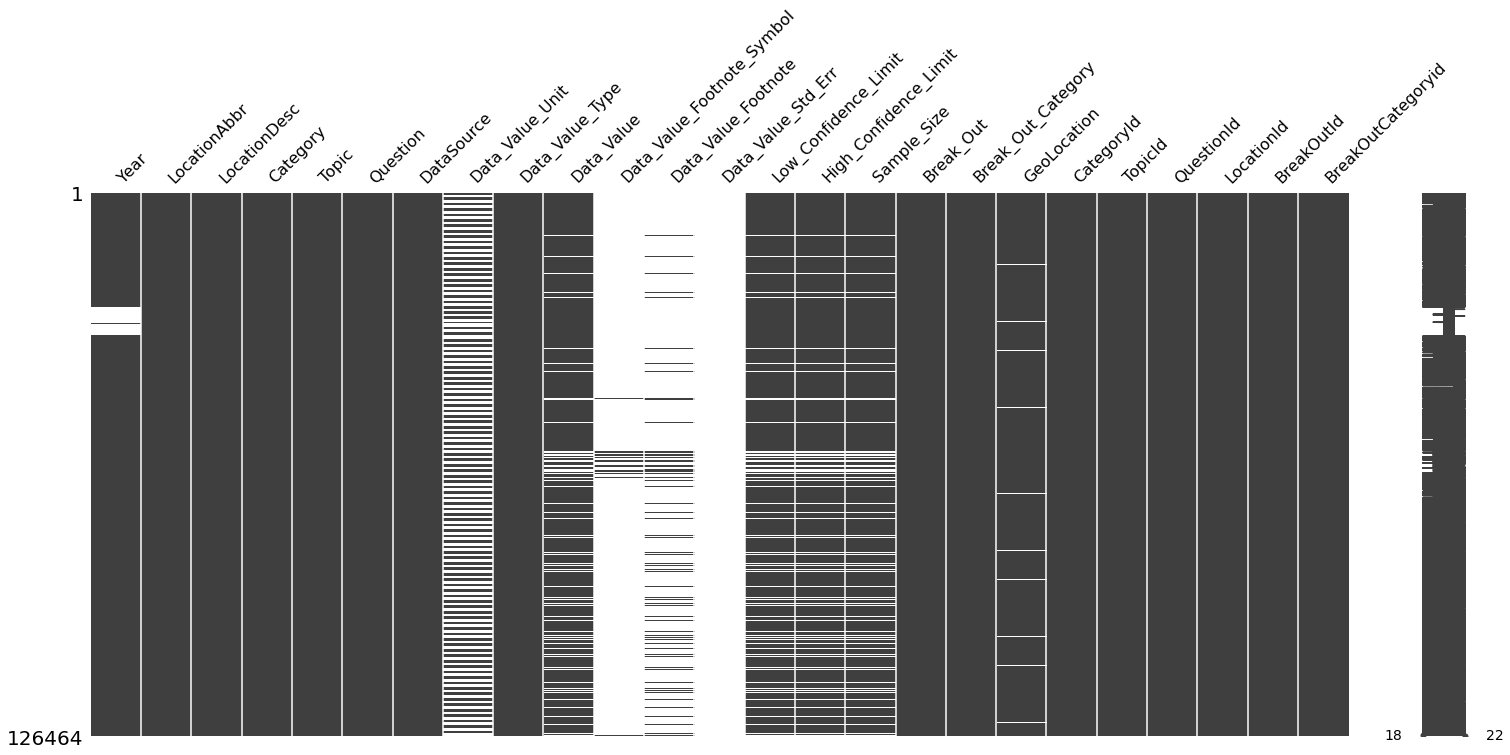

In [7]:
msno.matrix(df_health_quality)

##### Columns to drop

Drop missing value column

- `Data_Value_Footnote_Symbol`
- `Data_Value_footnote`
- `Data_Value_Std_Err`

Drop not in used column

- `DataSource`, `CategoryId`, `TopicId`, `QuestionId`, `LocationId`, `BreakOutId`, `BreakOutCategoryid`

Other than that, `Data_Value_Unit` will be dropped too because it's the same as `Data_Value_Type`

##### Row to drop
- The row with missing value in column `Year`

In [8]:
# Double check that all year counts are the same. No missing year.
df_health_quality.Year.value_counts(sort=True)

1993    6656
2008    6656
2009    6656
1994    6656
1995    6656
1996    6656
1997    6656
1998    6656
1999    6656
2000    6656
2001    6656
2002    6656
2003    6656
2004    6656
2005    6656
2006    6656
2007    6656
2010    6656
Name: Year, dtype: Int64

In [9]:
# check any row with null value for column 0-5
# df_health_quality[df_health_quality.iloc[:,[18]].isna().any(axis=1)]

In [10]:
# columns to drop
df_health_quality.drop(
    columns=["DataSource",
             "Data_Value_Footnote_Symbol",
             "Data_Value_Footnote",
             "Data_Value_Std_Err",
             "CategoryId",
             "TopicId",
             "QuestionId",
             "LocationId",
             "BreakOutId",
             "BreakOutCategoryid",
             "Data_Value_Unit",
             "GeoLocation"], 
    inplace=True)

# rows to drop
df_health_quality = df_health_quality[df_health_quality['Year'].notna()]

<AxesSubplot:>

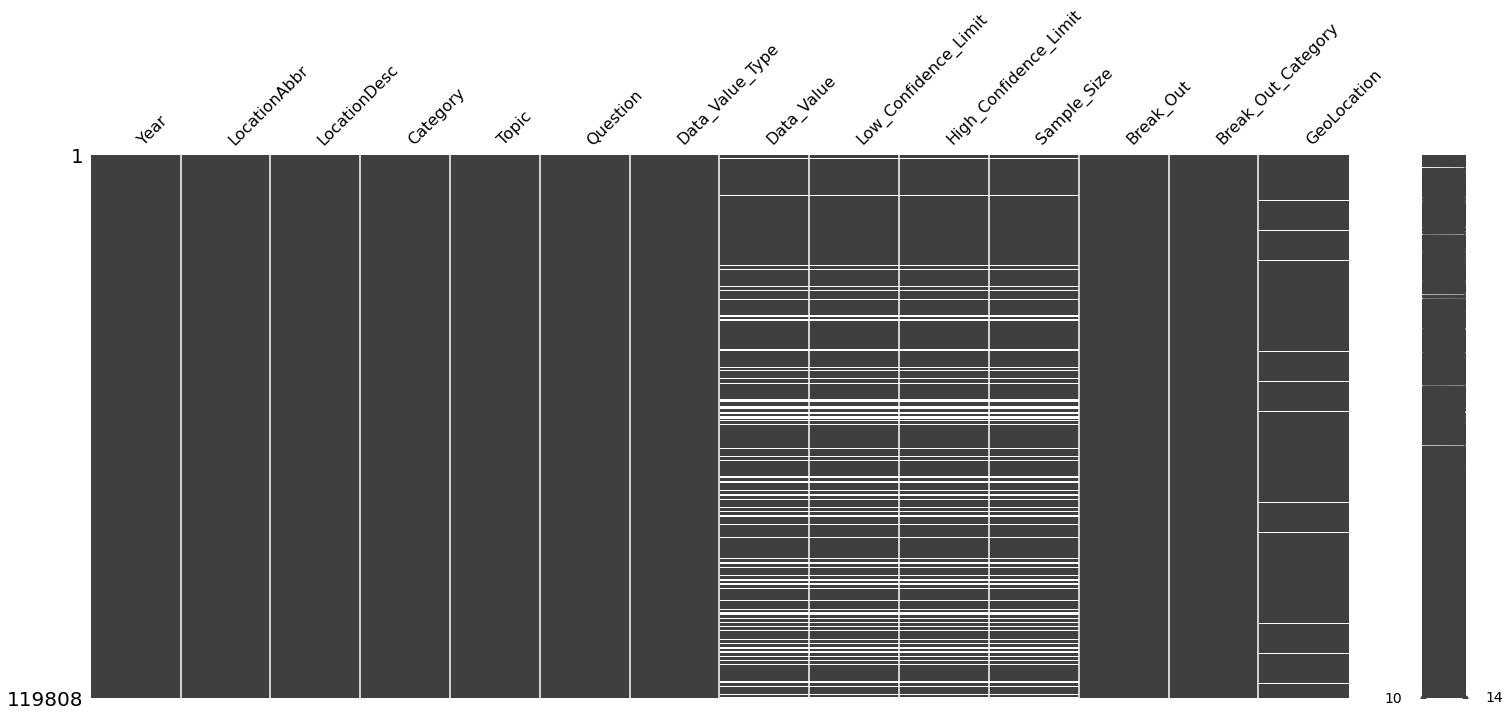

In [11]:
msno.matrix(df_health_quality)

In [12]:
df_health_quality[df_health_quality.isna().any(axis=1)]

,Year,LocationAbbr,LocationDesc,Category,Topic,Question,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Break_Out,Break_Out_Category,GeoLocation
10,2010,AL,Alabama,Health Status/Healthy Days,Activity Limitation,Mean days of activity limitation,Average number of days,NaN,NaN,NaN,<NA>,Asian/Pacific Islander,Race/Ethnicity,"(32.84057112200048, -86.63186076199969)"
26,2010,AL,Alabama,Health Status/Healthy Days,Mental Health,Mean mentally unhealthy days,Average number of days,NaN,NaN,NaN,<NA>,Asian/Pacific Islander,Race/Ethnicity,"(32.84057112200048, -86.63186076199969)"
42,2010,AL,Alabama,Health Status/Healthy Days,General Health,Mean physically or mentally unhealthy days,Average number of days,NaN,NaN,NaN,<NA>,Asian/Pacific Islander,Race/Ethnicity,"(32.84057112200048, -86.63186076199969)"
58,2010,AL,Alabama,Health Status/Healthy Days,Physical Health,Mean physically unhealthy days,Average number of days,NaN,NaN,NaN,<NA>,Asian/Pacific Islander,Race/Ethnicity,"(32.84057112200048, -86.63186076199969)"
74,2010,AL,Alabama,Health Status/Healthy Days,Physical Health,Percentage with 14 or more activity limitation...,Percentage,NaN,NaN,NaN,<NA>,Asian/Pacific Islander,Race/Ethnicity,"(32.84057112200048, -86.63186076199969)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126459,1993,WY,Wyoming,Health Status/Healthy Days,General Health,Percentage with fair or poor self-rated health,Percentage,NaN,NaN,NaN,<NA>,Black non-Hispanic,Race/Ethnicity,"(43.23554134300048, -108.10983035299967)"
126460,1993,WY,Wyoming,Health Status/Healthy Days,General Health,Percentage with fair or poor self-rated health,Percentage,NaN,NaN,NaN,<NA>,Hispanic,Race/Ethnicity,"(43.23554134300048, -108.10983035299967)"
126461,1993,WY,Wyoming,Health Status/Healthy Days,General Health,Percentage with fair or poor self-rated health,Percentage,NaN,NaN,NaN,<NA>,Native American/Alaskan Native,Race/Ethnicity,"(43.23554134300048, -108.10983035299967)"
126462,1993,WY,Wyoming,Health Status/Healthy Days,General Health,Percentage with fair or poor self-rated health,Percentage,NaN,NaN,NaN,<NA>,Other non-Hispanic,Race/Ethnicity,"(43.23554134300048, -108.10983035299967)"


In [13]:
print(df_health_quality.columns.tolist())
print(len(df_health_quality.columns.tolist()))

['Year', 'LocationAbbr', 'LocationDesc', 'Category', 'Topic', 'Question', 'Data_Value_Type', 'Data_Value', 'Low_Confidence_Limit', 'High_Confidence_Limit', 'Sample_Size', 'Break_Out', 'Break_Out_Category', 'GeoLocation']
14


In [14]:
# columns reorder
df_health_quality = df_health_quality[
    ["Year", 
     "LocationAbbr", "LocationDesc", "GeoLocation",
     'Category', 
     'Topic', 'Question',
     'Break_Out_Category', 'Break_Out',
     'Data_Value_Type', 'Data_Value',
     'Low_Confidence_Limit', 'High_Confidence_Limit',
     'Sample_Size',
    ]
]

In [15]:
print(df_health_quality.columns.tolist())
print(len(df_health_quality.columns.tolist()))

['Year', 'LocationAbbr', 'LocationDesc', 'GeoLocation', 'Category', 'Topic', 'Question', 'Break_Out_Category', 'Break_Out', 'Data_Value_Type', 'Data_Value', 'Low_Confidence_Limit', 'High_Confidence_Limit', 'Sample_Size']
14


<AxesSubplot:>

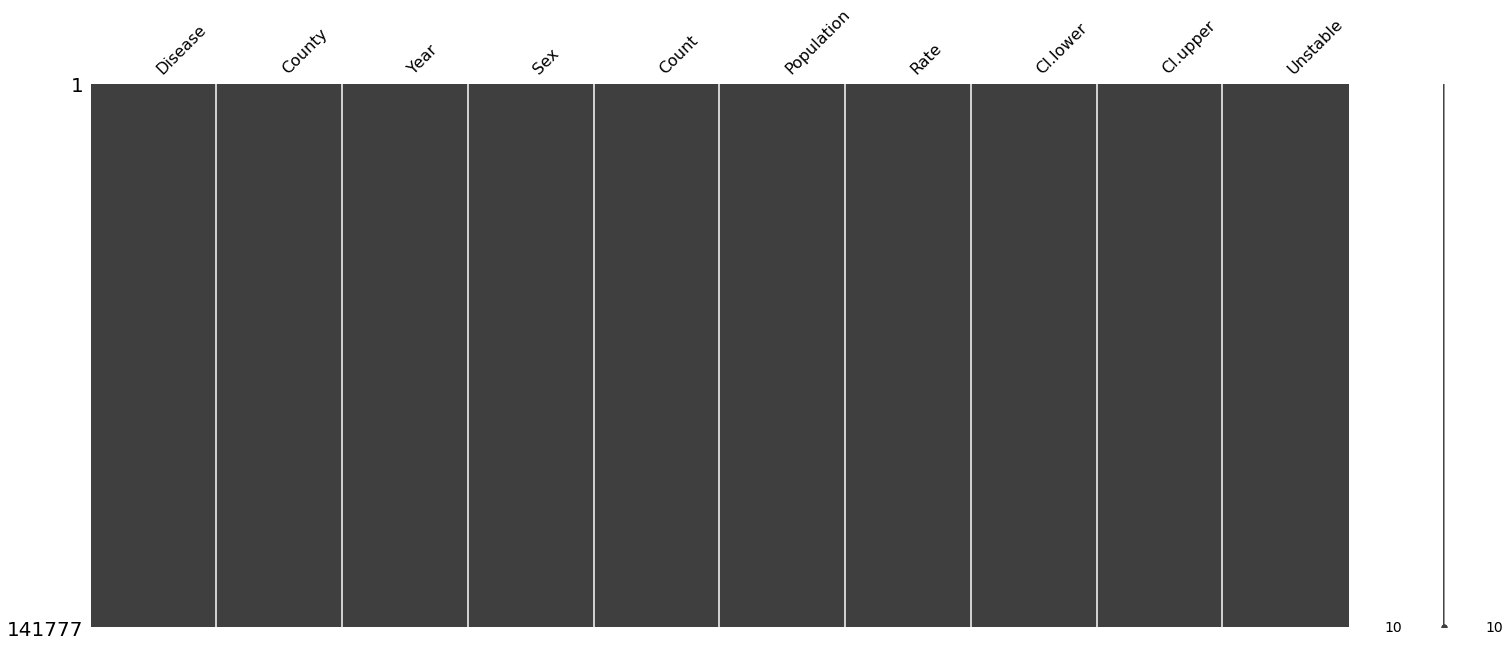

In [16]:
msno.matrix(df_cid_cases)

In [17]:
df_cid_cases[df_cid_cases.isna().any(axis=1)]

,Disease,County,Year,Sex,Count,Population,Rate,CI.lower,CI.upper,Unstable


### EDA for Group By

In [25]:
# quality of life

df_health_quality_groupby_Year = df_health_quality.groupby(by=["Year"], dropna=False).sum()
df_health_quality_groupby_Year

,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size
Year,,,,
1993,34040.7,21851.0,46491.7,6299544
1994,34117.9,21974.9,46457.7,6559824
1995,35550.6,23384.5,47939.8,7047880
1996,35586.9,23426.3,47985.0,7557096
1997,37129.0,24152.6,50446.5,8214976
1998,38334.9,25478.2,51479.4,9058568
1999,39412.7,25920.2,53191.0,9649336
2000,41499.6,28023.1,55293.2,11057880
2001,45036.2,30784.8,59597.2,12436184


In [74]:
df_health_quality_groupby_Break_Out = df_health_quality.groupby(by=['Break_Out'], dropna=False).sum()
df_health_quality_groupby_Break_Out

,Year,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size
Break_Out,,,,,
18-24 years old,14987232,34514.6,18682.0,51596.4,3905285
25-34 years old,14987232,34707.6,23555.0,46264.5,9264350
35-44 years old,14987232,41571.7,30593.3,52784.6,12345918
45-54 years old,14987232,52443.4,39716.0,65323.8,13291510
55-64 years old,14987232,62162.3,46596.8,77860.5,11776524
65-74 years old,14987232,63736.6,47105.6,80535.2,9234343
75+,14987232,79604.4,58463.6,101031.7,7267521
Asian/Pacific Islander,14987232,16957.5,4000.4,34703.4,1383500
Black non-Hispanic,14987232,47795.8,29141.8,67827.6,5292995


### Data Needed
Second round filter to select data that will be used.

Quality of life (1)
- Year
- Question
- LocationDesc
- Data_Value
- Break_Out (tooltip pie chart)
- Break_Out_Data_Value (tooltip pie chart) 
 
Quality of life (2)
- Year
- Question
- Break_Out
- Data_Value
- Low CL
- High CL
- Sample Size

Infectious Disease
- Year
- Disease
- County
- Sex
- Rate
- Count

## Parse Dataframe To Json

In [75]:
test = df_health_quality.iloc[:1000,:]
test

,Year,LocationAbbr,LocationDesc,GeoLocation,Category,Topic,Question,Break_Out_Category,Break_Out,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size
0,2010,AL,Alabama,"(32.84057112200048, -86.63186076199969)",Health Status/Healthy Days,Activity Limitation,Mean days of activity limitation,Age Group,18-24 years old,Average number of days,0.9,0.3,1.5,202
1,2010,AL,Alabama,"(32.84057112200048, -86.63186076199969)",Health Status/Healthy Days,Activity Limitation,Mean days of activity limitation,Age Group,25-34 years old,Average number of days,2.0,1.3,2.7,597
2,2010,AL,Alabama,"(32.84057112200048, -86.63186076199969)",Health Status/Healthy Days,Activity Limitation,Mean days of activity limitation,Age Group,35-44 years old,Average number of days,2.3,1.8,2.9,892
3,2010,AL,Alabama,"(32.84057112200048, -86.63186076199969)",Health Status/Healthy Days,Activity Limitation,Mean days of activity limitation,Age Group,45-54 years old,Average number of days,4.2,3.6,4.9,1352
4,2010,AL,Alabama,"(32.84057112200048, -86.63186076199969)",Health Status/Healthy Days,Activity Limitation,Mean days of activity limitation,Age Group,55-64 years old,Average number of days,4.0,3.4,4.6,1621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2010,DE,Delaware,"(39.008830667000495, -75.57774116799965)",Health Status/Healthy Days,Activity Limitation,Percentage with 14 or more physically unhealth...,Age Group,25-34 years old,Percentage,4.0,1.8,7.9,323
996,2010,DE,Delaware,"(39.008830667000495, -75.57774116799965)",Health Status/Healthy Days,Activity Limitation,Percentage with 14 or more physically unhealth...,Age Group,35-44 years old,Percentage,8.5,6.0,11.8,546
997,2010,DE,Delaware,"(39.008830667000495, -75.57774116799965)",Health Status/Healthy Days,Activity Limitation,Percentage with 14 or more physically unhealth...,Age Group,45-54 years old,Percentage,10.0,7.6,12.9,761
998,2010,DE,Delaware,"(39.008830667000495, -75.57774116799965)",Health Status/Healthy Days,Activity Limitation,Percentage with 14 or more physically unhealth...,Age Group,55-64 years old,Percentage,13.2,10.4,16.4,941


In [77]:
json_health_quality = test.to_json(orient="records")
parsed_health_quality = json.loads(json_health_quality)
print(json.dumps(parsed_health_quality, indent=4))

[
    {
        "Year": 2010,
        "LocationAbbr": "AL",
        "LocationDesc": "Alabama",
        "GeoLocation": "(32.84057112200048, -86.63186076199969)",
        "Category": "Health Status/Healthy Days",
        "Topic": "Activity Limitation",
        "Question": "Mean days of activity limitation",
        "Break_Out_Category": "Age Group",
        "Break_Out": "18-24 years old",
        "Data_Value_Type": "Average number of days",
        "Data_Value": 0.9,
        "Low_Confidence_Limit": 0.3,
        "High_Confidence_Limit": 1.5,
        "Sample_Size": 202
    },
    {
        "Year": 2010,
        "LocationAbbr": "AL",
        "LocationDesc": "Alabama",
        "GeoLocation": "(32.84057112200048, -86.63186076199969)",
        "Category": "Health Status/Healthy Days",
        "Topic": "Activity Limitation",
        "Question": "Mean days of activity limitation",
        "Break_Out_Category": "Age Group",
        "Break_Out": "25-34 years old",
        "Data_Value_Type": "Avera

In [91]:
dict_quality_of_life = {}

for a in parsed_health_quality:
    dict_quality_of_life[str(a['Year'])] = {}

for b in a:
    dict_quality_of_life[str(phq['Year'])][str(phq['LocationDesc'])] = {}
    
for phq in parsed_health_quality:
    dict_quality_of_life[str(phq['Year'])][phq['LocationDesc']][phq['Question']] = {}
    
# for phq in parsed_health_quality:
#     dict_quality_of_life[phq['Year']][phq['LocationDesc']][phq['Question']][phq['Question']] = {}

dict_quality_of_life['2010']['California']

TypeError: string indices must be integers

In [21]:
from itertools import groupby

In [23]:
# define fuctions for key
def key_func_year(k):
    return k['Year']

def key_func_LocationAbbr(k):
    return k['LocationDesc']
  
# sort INFO data by 'company' key.
# test2 = sorted(parsed_health_quality, key=key_func)
  
for key, value in groupby(parsed_health_quality, key_func_LocationAbbr):
    print(key)
    print(list(value))

Alabama
[{'Year': 2010, 'LocationAbbr': 'AL', 'LocationDesc': 'Alabama', 'GeoLocation': '(32.84057112200048, -86.63186076199969)', 'Category': 'Health Status/Healthy Days', 'Topic': 'Activity Limitation', 'Question': 'Mean days of activity limitation', 'Break_Out_Category': 'Age Group', 'Break_Out': '18-24 years old', 'Data_Value_Type': 'Average number of days', 'Data_Value': 0.9, 'Low_Confidence_Limit': 0.3, 'High_Confidence_Limit': 1.5, 'Sample_Size': 202}, {'Year': 2010, 'LocationAbbr': 'AL', 'LocationDesc': 'Alabama', 'GeoLocation': '(32.84057112200048, -86.63186076199969)', 'Category': 'Health Status/Healthy Days', 'Topic': 'Activity Limitation', 'Question': 'Mean days of activity limitation', 'Break_Out_Category': 'Age Group', 'Break_Out': '25-34 years old', 'Data_Value_Type': 'Average number of days', 'Data_Value': 2.0, 'Low_Confidence_Limit': 1.3, 'High_Confidence_Limit': 2.7, 'Sample_Size': 597}, {'Year': 2010, 'LocationAbbr': 'AL', 'LocationDesc': 'Alabama', 'GeoLocation': '(